In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('./classification_df_train.csv')

In [3]:
df_test = pd.read_csv('./classification_df_test.csv')

In [4]:
X_train = df_train.drop('Species', axis=1)

In [5]:
y_train = df_train['Species']

In [6]:
X_test = df_test.drop('Species', axis=1)

In [7]:
y_test = df_test['Species']

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import make_scorer,confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [9]:
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [2,4,6,8],
    'min_samples_split': range(5,10),
    'min_samples_leaf': [2,3,4,5],
    'max_features' : ['sqrt', 'log2']
}

In [10]:
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average='macro', labels=np.unique(y_train), zero_division=1),
           'recall': make_scorer(recall_score, average='macro', labels=np.unique(y_train),),
           'f1_score': make_scorer(f1_score, average='macro', labels=np.unique(y_train),)}

In [11]:
dt_estimator = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=params, cv=5, scoring=scoring, refit='f1_score')

In [12]:
dt_estimator.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': range(5, 10)},
             refit='f1_score',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score, average=macro, la...
 'HylaMinuta' 'HypsiboasCinerascens' 'HypsiboasCordobae'
 'LeptodactylusFuscus' 'OsteocephalusOophagus' 'Rhinellagranulosa'
 'ScinaxRuber'], zero_division=1),
                      'recall': make_scorer(recall_score, average=macro, labels=['AdenomeraAndre' 'AdenomeraHylaedactylus' 'Ameeregatrivittata'
 'HylaMinuta' 'HypsiboasCinerascens' 'HypsiboasCordobae'
 'LeptodactylusFuscus' 'OsteocephalusOophagus' 'Rhinellagranulosa'
 'ScinaxRuber'])})

In [13]:
# Retrieve the best hyperparameters for accuracy
best_accuracy_index = np.argmax(dt_estimator.cv_results_['mean_test_accuracy'])
best_accuracy_params = dt_estimator.cv_results_['params'][best_accuracy_index]
best_accuracy_score = dt_estimator.cv_results_['mean_test_accuracy'][best_accuracy_index]
print(f"Best hyperparameters based on accuracy: {best_accuracy_params}, Accuracy: {best_accuracy_score}")

# Retrieve the best hyperparameters for precision
best_precision_index = np.argmax(dt_estimator.cv_results_['mean_test_precision'])
best_precision_params = dt_estimator.cv_results_['params'][best_precision_index]
best_precision_score = dt_estimator.cv_results_['mean_test_precision'][best_precision_index]
print(f"Best hyperparameters based on precision: {best_precision_params}, Precision: {best_precision_score}")

# Retrieve the best hyperparameters for recall
best_recall_index = np.argmax(dt_estimator.cv_results_['mean_test_recall'])
best_recall_params = dt_estimator.cv_results_['params'][best_recall_index]
best_recall_score = dt_estimator.cv_results_['mean_test_recall'][best_recall_index]
print(f"Best hyperparameters based on recall: {best_recall_params}, Recall: {best_recall_score}")

# Retrieve the best hyperparameters for f1_score
best_f1_score_index = np.argmax(dt_estimator.cv_results_['mean_test_f1_score'])
best_f1_score_params = dt_estimator.cv_results_['params'][best_f1_score_index]
best_f1_score_score = dt_estimator.cv_results_['mean_test_f1_score'][best_f1_score_index]
print(f"Best hyperparameters based on f1_score: {best_f1_score_params}, F1_score: {best_f1_score_score}")

Best hyperparameters based on accuracy: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 7}, Accuracy: 0.9714036617262425
Best hyperparameters based on precision: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 7}, Precision: 0.9716644315403933
Best hyperparameters based on recall: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 7}, Recall: 0.9714029930264196
Best hyperparameters based on f1_score: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 7}, F1_score: 0.9713910945859109


In [54]:
def plot_bar(labels, values, title=None, xlabel=None, ylabel=None):
  plt.bar(labels, values)
  for i in range(len(values)):
    plt.annotate('{:.3f}'.format(values[i]), xy=(labels[i], values[i]), ha='center', va='bottom')
  if xlabel is not None: 
    plt.xlabel(xlabel)
  if ylabel is not None: 
    plt.ylabel(ylabel)
  if title is not None: 
    plt.title(title)

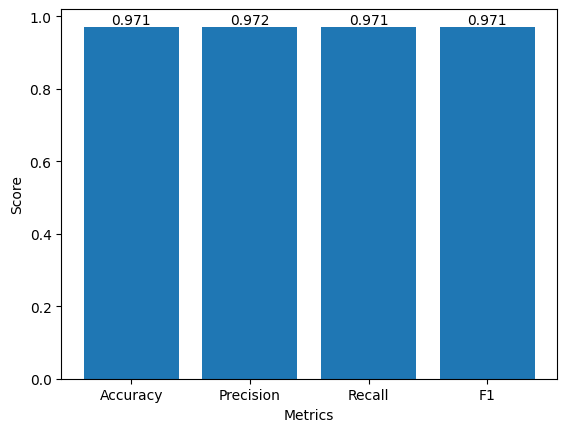

In [55]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
score_values = [best_accuracy_score, best_precision_score, best_recall_score, best_f1_score_score]
plot_bar(metrics, score_values, xlabel='Metrics', ylabel='Score')

In [15]:
dt_estimator.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=7,
                       random_state=42)

In [16]:
dt_estimator.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 7}

In [17]:
dt_estimator.best_score_

0.9713910945859109

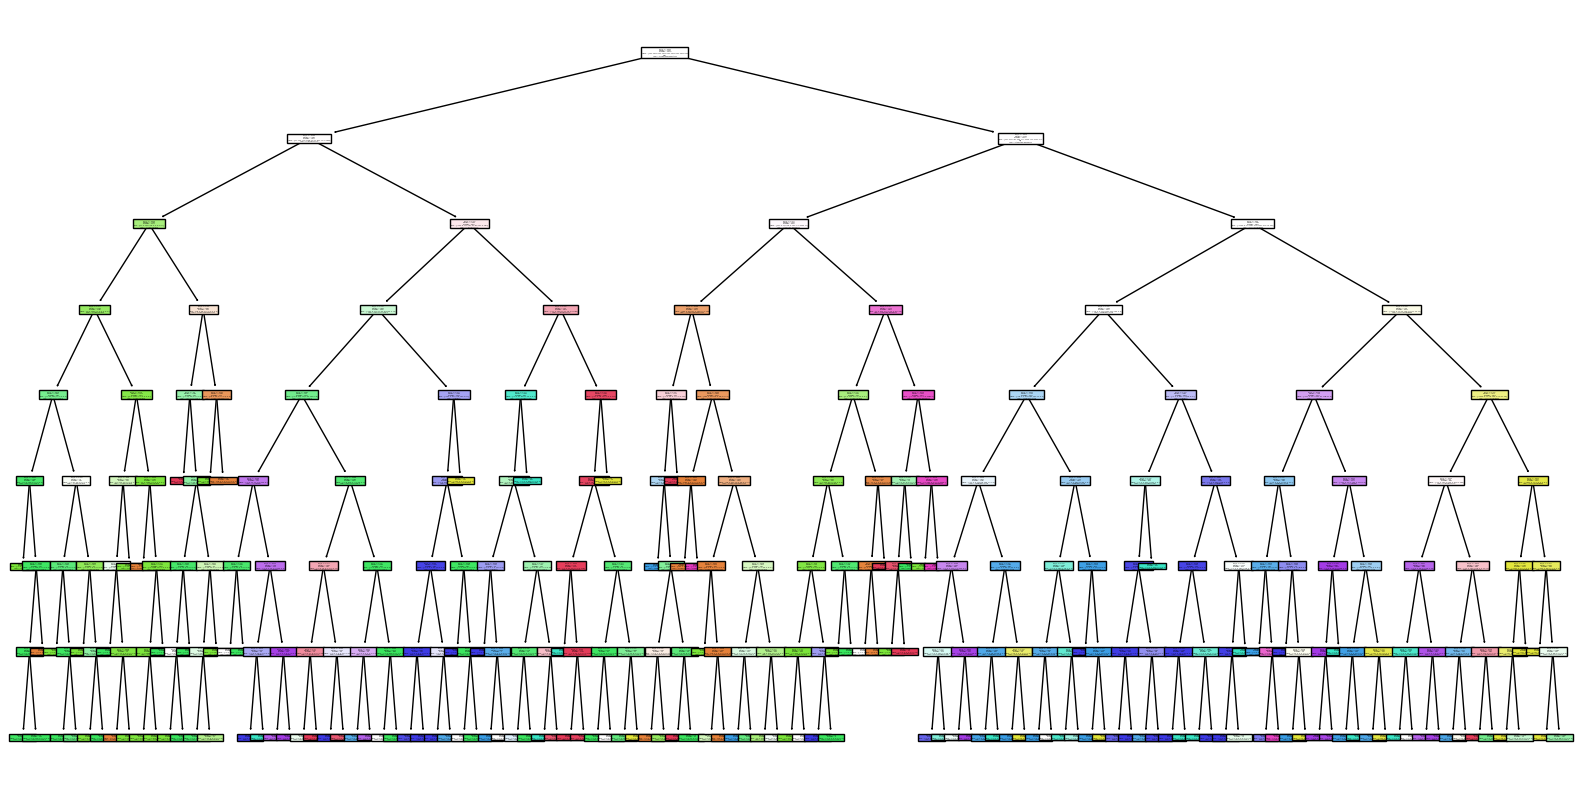

In [18]:
plt.figure(figsize=(20,10))
plot_tree(dt_estimator.best_estimator_, class_names=y_train.unique(), feature_names=X_train.columns, filled=True)
plt.show()

In [19]:
y_train_pred = dt_estimator.best_estimator_.predict(X_train)

In [20]:
def plot_confusion_matrix(matrix):
  mask = np.triu(np.ones_like(matrix, dtype=bool),k=matrix.shape[0])

  cmap = sns.diverging_palette(250, 15, s=250, l=50, center="light", as_cmap=True)

  plt.figure(figsize=(10,10))
  sns.heatmap(matrix, mask=mask, center=0, annot=True, fmt='g', square=True, cmap=cmap)
  plt.yticks(rotation=45, ha='right')

  plt.show(); 

In [22]:
conf_matrix_train = confusion_matrix(y_true=y_train, y_pred=y_train_pred)
conf_matrix_train

array([[2220,    0,   60,   14,    0,    0,    0,    0,    0,    0],
       [   0, 2215,    0,   67,    0,    9,    2,    0,    0,    1],
       [   1,    0, 2275,   15,    0,    0,    0,    0,    0,    3],
       [   0,   23,   47, 2192,    0,    3,    0,    0,    0,   29],
       [   0,    0,    0,    1, 2256,    7,   17,    9,    1,    3],
       [   0,    0,    0,   11,   34, 2229,   13,    6,    0,    1],
       [   0,    0,    0,    6,   60,   34, 2194,    0,    0,    0],
       [   0,    0,    0,    0,   46,    5,    0, 2243,    0,    0],
       [   0,    0,    0,   17,    0,    0,    0,    4, 2273,    0],
       [   0,    0,    0,   38,    0,    6,    0,   28,    0, 2222]])

In [23]:
conf_matrix_train_df = pd.DataFrame(conf_matrix_train, columns=y_train.unique(), index=pd.Series(y_train).unique())
conf_matrix_train_df

,AdenomeraHylaedactylus,HypsiboasCordobae,AdenomeraAndre,LeptodactylusFuscus,HypsiboasCinerascens,Ameeregatrivittata,HylaMinuta,ScinaxRuber,OsteocephalusOophagus,Rhinellagranulosa
AdenomeraHylaedactylus,2220,0,60,14,0,0,0,0,0,0
HypsiboasCordobae,0,2215,0,67,0,9,2,0,0,1
AdenomeraAndre,1,0,2275,15,0,0,0,0,0,3
LeptodactylusFuscus,0,23,47,2192,0,3,0,0,0,29
HypsiboasCinerascens,0,0,0,1,2256,7,17,9,1,3
Ameeregatrivittata,0,0,0,11,34,2229,13,6,0,1
HylaMinuta,0,0,0,6,60,34,2194,0,0,0
ScinaxRuber,0,0,0,0,46,5,0,2243,0,0
OsteocephalusOophagus,0,0,0,17,0,0,0,4,2273,0
Rhinellagranulosa,0,0,0,38,0,6,0,28,0,2222


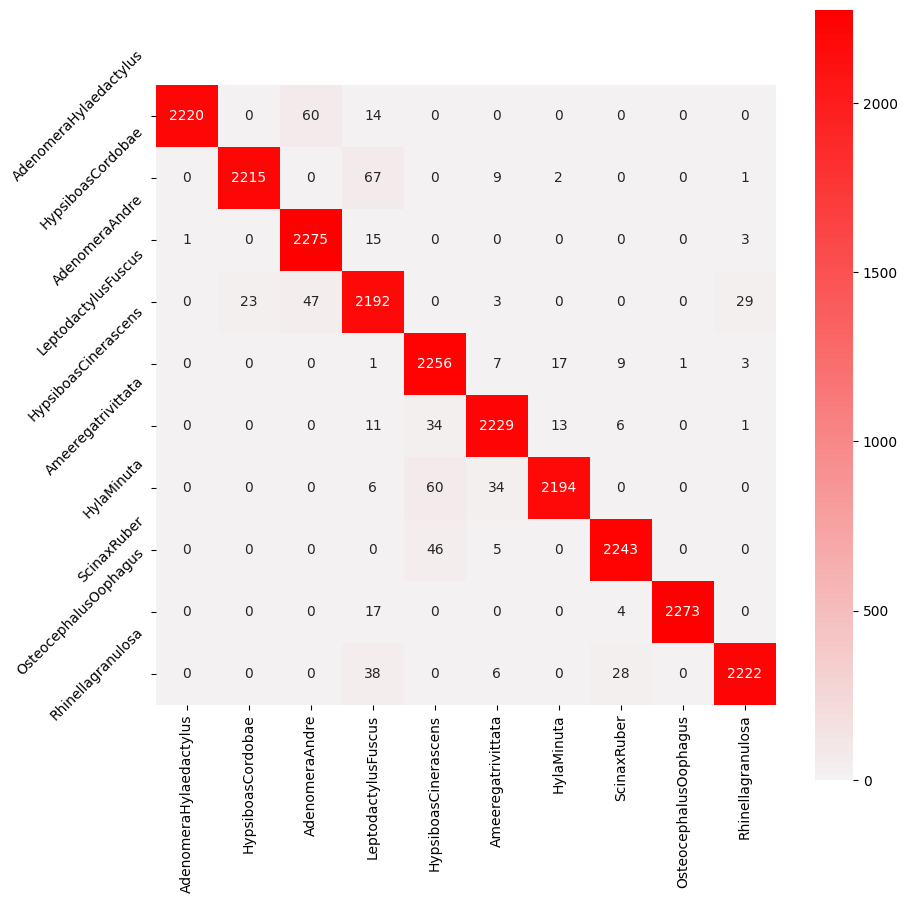

In [24]:
plot_confusion_matrix(conf_matrix_train_df)

In [25]:
dt_accuracy_train = accuracy_score(y_train, y_train_pred)

In [26]:
y_test_pred = dt_estimator.best_estimator_.predict(X_test)

In [27]:
conf_matrix_test = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
conf_matrix_test

array([[159,   0,  12,  20,   3,   1,   0,   3,   0,   4],
       [  1, 986,   0,  44,   3,   7,   2,   0,   0,   1],
       [  2,   0, 151,   8,   0,   0,   0,   0,   0,   2],
       [  1,   5,  22,  65,   0,   0,   0,   0,   0,   0],
       [  1,   3,   0,   1, 125,   4,   0,   5,   0,   3],
       [  0,   5,   0,   3,  29, 291,   5,   2,   0,   1],
       [  0,   1,   1,   5,  12,   7,  52,   2,   1,   0],
       [  0,   1,   0,   0,   8,   3,   3,  19,   0,   0],
       [  2,   0,   0,   1,   0,   0,   2,   0,  15,   0],
       [  1,   2,   5,   2,   1,   1,   1,   0,   0,  31]])

In [28]:
conf_matrix_test_df = pd.DataFrame(conf_matrix_test, columns=y_test.unique(), index=pd.Series(y_test).unique())
conf_matrix_test_df

,AdenomeraHylaedactylus,HypsiboasCordobae,Ameeregatrivittata,ScinaxRuber,AdenomeraAndre,LeptodactylusFuscus,HylaMinuta,HypsiboasCinerascens,OsteocephalusOophagus,Rhinellagranulosa
AdenomeraHylaedactylus,159,0,12,20,3,1,0,3,0,4
HypsiboasCordobae,1,986,0,44,3,7,2,0,0,1
Ameeregatrivittata,2,0,151,8,0,0,0,0,0,2
ScinaxRuber,1,5,22,65,0,0,0,0,0,0
AdenomeraAndre,1,3,0,1,125,4,0,5,0,3
LeptodactylusFuscus,0,5,0,3,29,291,5,2,0,1
HylaMinuta,0,1,1,5,12,7,52,2,1,0
HypsiboasCinerascens,0,1,0,0,8,3,3,19,0,0
OsteocephalusOophagus,2,0,0,1,0,0,2,0,15,0
Rhinellagranulosa,1,2,5,2,1,1,1,0,0,31


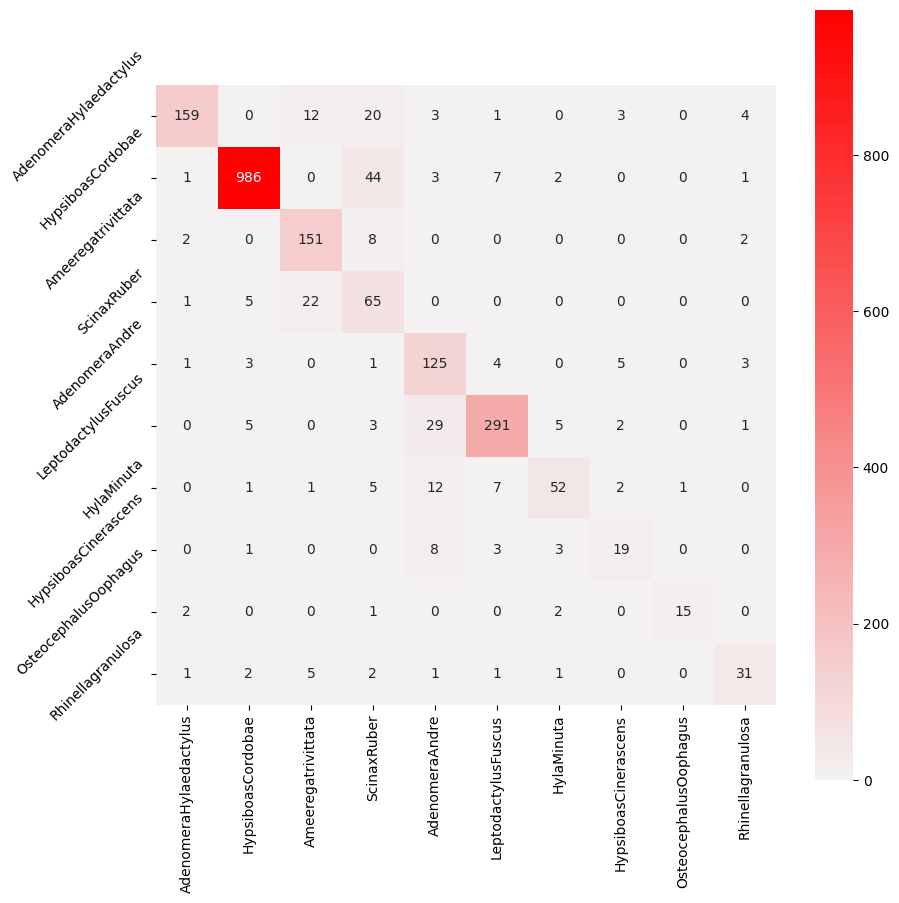

In [29]:
plot_confusion_matrix(conf_matrix_test_df)

In [30]:
dt_accuracy_test = accuracy_score(y_test, y_test_pred)

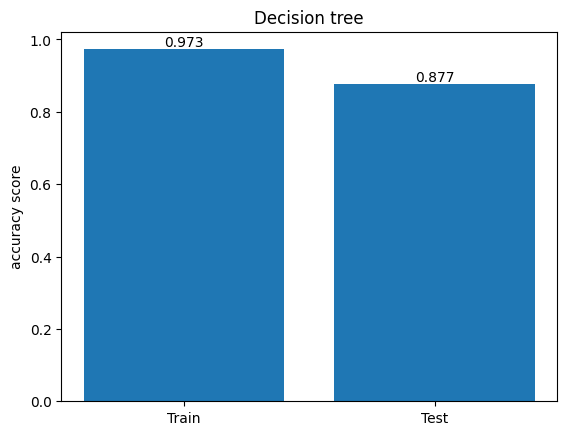

In [56]:
plot_bar(['Train', 'Test'], [dt_accuracy_train, dt_accuracy_test], title='Decision tree', ylabel='accuracy score')

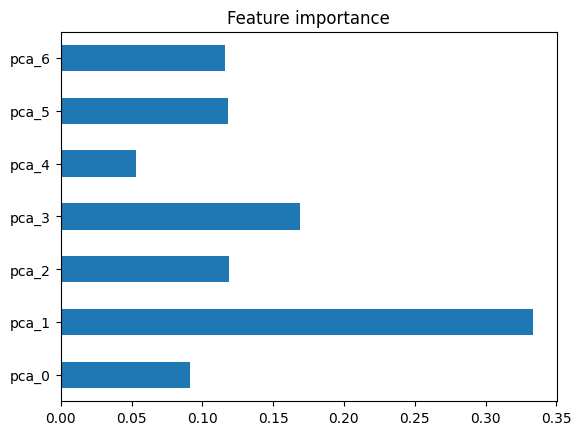

In [32]:
pd.Series(dt_estimator.best_estimator_.feature_importances_, index=X_train.columns).plot.barh()
plt.title("Feature importance")
plt.show()

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
params={
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [8],
    'min_samples_split': [7],
    'min_samples_leaf': [2],
    'n_estimators':[10,50,100]
}

In [35]:
rf_estimator = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=params, cv=5, scoring='accuracy')

In [36]:
rf_estimator.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [8], 'min_samples_leaf': [2],
                         'min_samples_split': [7],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [37]:
rf_estimator.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=2,
                       min_samples_split=7, random_state=42)

In [38]:
rf_estimator.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 7,
 'n_estimators': 100}

In [39]:
rf_estimator.best_score_

0.9979511769834352

In [40]:
rf_estimator.best_estimator_.n_estimators

100

In [41]:
y_train_pred_rf = rf_estimator.best_estimator_.predict(X_train)

In [42]:
conf_matrix_train_rf = confusion_matrix(y_true=y_train, y_pred=y_train_pred_rf)
conf_matrix_train_rf

array([[2294,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 2290,    0,    4,    0,    0,    0,    0,    0,    0],
       [   0,    0, 2293,    1,    0,    0,    0,    0,    0,    0],
       [   0,    1,    0, 2293,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 2282,    0,    0,    9,    0,    3],
       [   0,    0,    0,    1,    0, 2293,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 2294,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 2294,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 2294,    0],
       [   0,    0,    0,    0,    0,    0,    0,    2,    0, 2292]])

In [43]:
conf_matrix_train_rf_df = pd.DataFrame(conf_matrix_train_rf, columns=y_train.unique(), index=pd.Series(y_train).unique())
conf_matrix_train_rf_df

,AdenomeraHylaedactylus,HypsiboasCordobae,AdenomeraAndre,LeptodactylusFuscus,HypsiboasCinerascens,Ameeregatrivittata,HylaMinuta,ScinaxRuber,OsteocephalusOophagus,Rhinellagranulosa
AdenomeraHylaedactylus,2294,0,0,0,0,0,0,0,0,0
HypsiboasCordobae,0,2290,0,4,0,0,0,0,0,0
AdenomeraAndre,0,0,2293,1,0,0,0,0,0,0
LeptodactylusFuscus,0,1,0,2293,0,0,0,0,0,0
HypsiboasCinerascens,0,0,0,0,2282,0,0,9,0,3
Ameeregatrivittata,0,0,0,1,0,2293,0,0,0,0
HylaMinuta,0,0,0,0,0,0,2294,0,0,0
ScinaxRuber,0,0,0,0,0,0,0,2294,0,0
OsteocephalusOophagus,0,0,0,0,0,0,0,0,2294,0
Rhinellagranulosa,0,0,0,0,0,0,0,2,0,2292


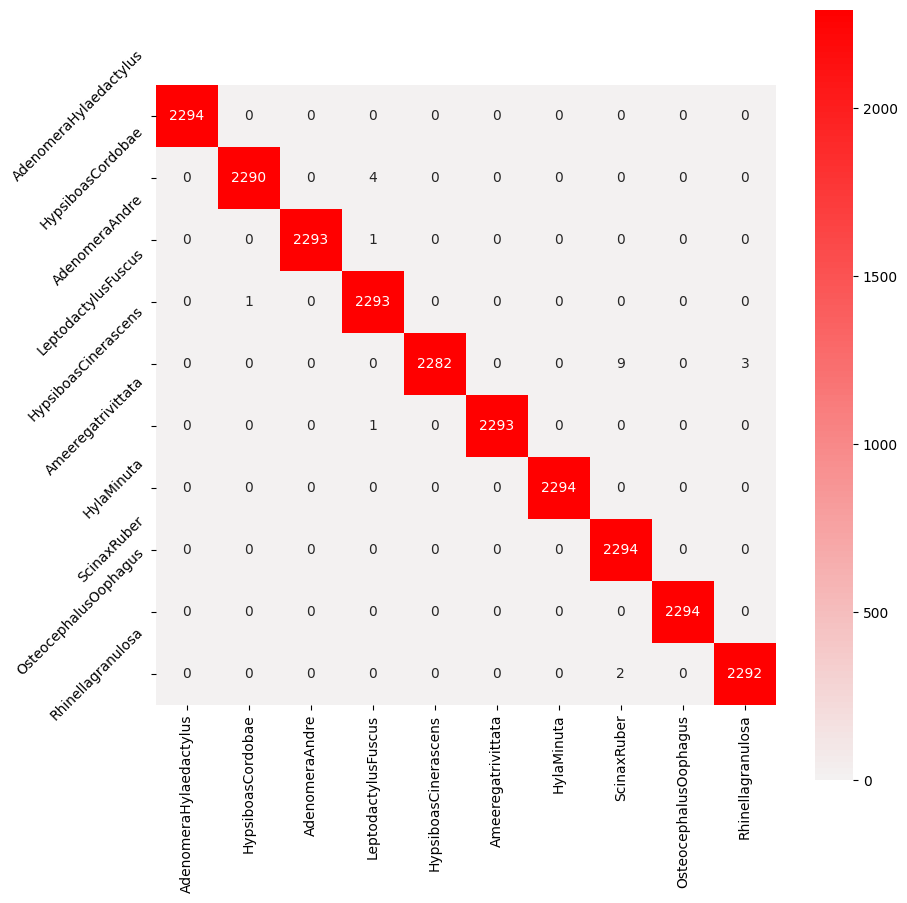

In [44]:
plot_confusion_matrix(conf_matrix_train_rf_df)

In [45]:
rf_accuracy_train = accuracy_score(y_train, y_train_pred_rf)

In [46]:
y_test_pred_rf = rf_estimator.best_estimator_.predict(X_test)

In [47]:
conf_matrix_test_rf = confusion_matrix(y_true=y_test, y_pred=y_test_pred_rf)
conf_matrix_test_rf

array([[ 168,    0,    7,   21,    5,    0,    0,    0,    1,    0],
       [   0, 1027,    0,   10,    1,    4,    0,    0,    1,    1],
       [   0,    0,  158,    4,    0,    1,    0,    0,    0,    0],
       [   0,    3,    6,   84,    0,    0,    0,    0,    0,    0],
       [   1,    0,    0,    0,  138,    1,    1,    1,    0,    0],
       [   0,    1,    0,    0,    9,  316,    7,    1,    0,    2],
       [   0,    0,    1,    0,    0,    2,   76,    0,    2,    0],
       [   0,    0,    0,    0,    6,    3,    1,   24,    0,    0],
       [   2,    0,    0,    0,    0,    0,    2,    0,   16,    0],
       [   0,    0,    0,    5,    0,    0,    0,    0,    2,   37]])

In [48]:
conf_matrix_test_rf_df = pd.DataFrame(conf_matrix_test_rf, columns=y_test.unique(), index=pd.Series(y_test).unique())
conf_matrix_test_rf_df

,AdenomeraHylaedactylus,HypsiboasCordobae,Ameeregatrivittata,ScinaxRuber,AdenomeraAndre,LeptodactylusFuscus,HylaMinuta,HypsiboasCinerascens,OsteocephalusOophagus,Rhinellagranulosa
AdenomeraHylaedactylus,168,0,7,21,5,0,0,0,1,0
HypsiboasCordobae,0,1027,0,10,1,4,0,0,1,1
Ameeregatrivittata,0,0,158,4,0,1,0,0,0,0
ScinaxRuber,0,3,6,84,0,0,0,0,0,0
AdenomeraAndre,1,0,0,0,138,1,1,1,0,0
LeptodactylusFuscus,0,1,0,0,9,316,7,1,0,2
HylaMinuta,0,0,1,0,0,2,76,0,2,0
HypsiboasCinerascens,0,0,0,0,6,3,1,24,0,0
OsteocephalusOophagus,2,0,0,0,0,0,2,0,16,0
Rhinellagranulosa,0,0,0,5,0,0,0,0,2,37


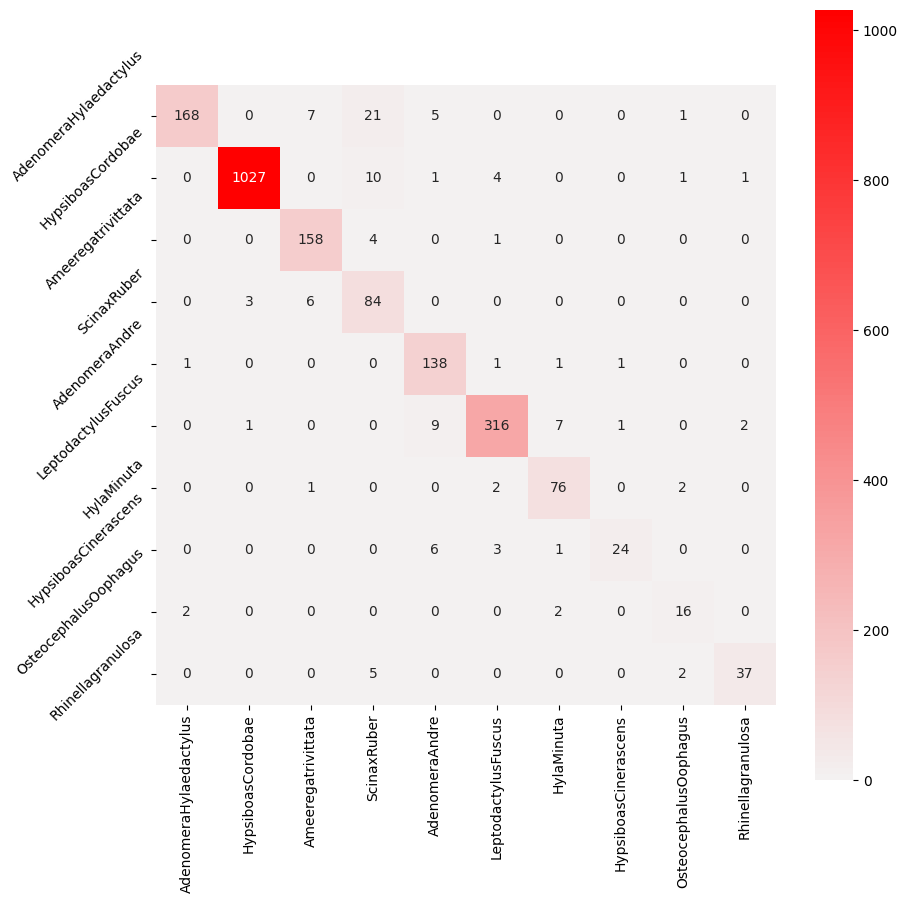

In [49]:
plot_confusion_matrix(conf_matrix_test_rf_df)

In [50]:
rf_accuracy_test = accuracy_score(y_test, y_test_pred_rf)

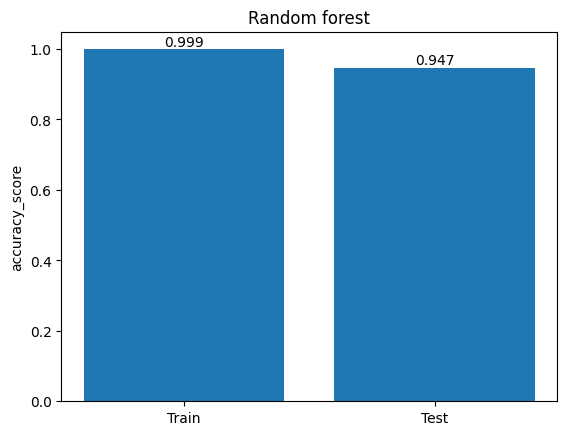

In [57]:
plot_bar(['Train', 'Test'], [rf_accuracy_train, rf_accuracy_test], title='Random forest', ylabel='accuracy_score')

In [52]:
import pickle
import os

In [53]:
output_directory = '../models/classification/'

models = [dt_estimator.best_estimator_, rf_estimator.best_estimator_]
names = ['DT_model.pkl', 'RF_model.pkl']
for model, name in zip(models, names):
  try:
    with open(os.path.join(output_directory, name), 'wb') as file:
      pickle.dump(model, file)
  except IOError as err:
    print('Error while exporting model \'{}\''.format(name.split('.')[0]))
    print(err)